In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pickle
import pandas as pd

In [2]:
higgs_file = open ("higgs_100000_pt_250_500.pkl", 'rb')
qcd_file = open ("qcd_100000_pt_250_500.pkl", 'rb')

# QCD is background, Higgs is signal
qcd = pickle.load(qcd_file)
higgs = pickle.load(higgs_file)


print("pt = Transverse Momentum")
print("eta = Pseudo Rapidity")
print("phi = Azimuthal Angle")
print("mass = Mass")
print("ee2 = Energy Correlation Function 2")
print("ee3 = Energy Correlation Function 3")
print("d2 = Energy Correlation Function")
print("angularity = Jet broadness to thrust ratio")
print("t1 = subjettiness of degree 1")
print("t2 = subjettiness of degree 2") 
print("t3 = subjettiness of degree 3")
print("t21 = ratio of t2/t1")
print("t32 = ratio of t3/t2")
print("KtDeltaR = Delta R of two subjets within large-R jet")

pt = Transverse Momentum
eta = Pseudo Rapidity
phi = Azimuthal Angle
mass = Mass
ee2 = Energy Correlation Function 2
ee3 = Energy Correlation Function 3
d2 = Energy Correlation Function
angularity = Jet broadness to thrust ratio
t1 = subjettiness of degree 1
t2 = subjettiness of degree 2
t3 = subjettiness of degree 3
t21 = ratio of t2/t1
t32 = ratio of t3/t2
KtDeltaR = Delta R of two subjets within large-R jet


Above is a translation of the name of the data inside the dataset to what it represents. From this point on these may be used interchangeably in descriptions and labels. Anytime "QCD" is used (as in the name of the dataset), it refers to the simulation data. Anytime "Higgs" is used it refers to the pseudo-experiment data.

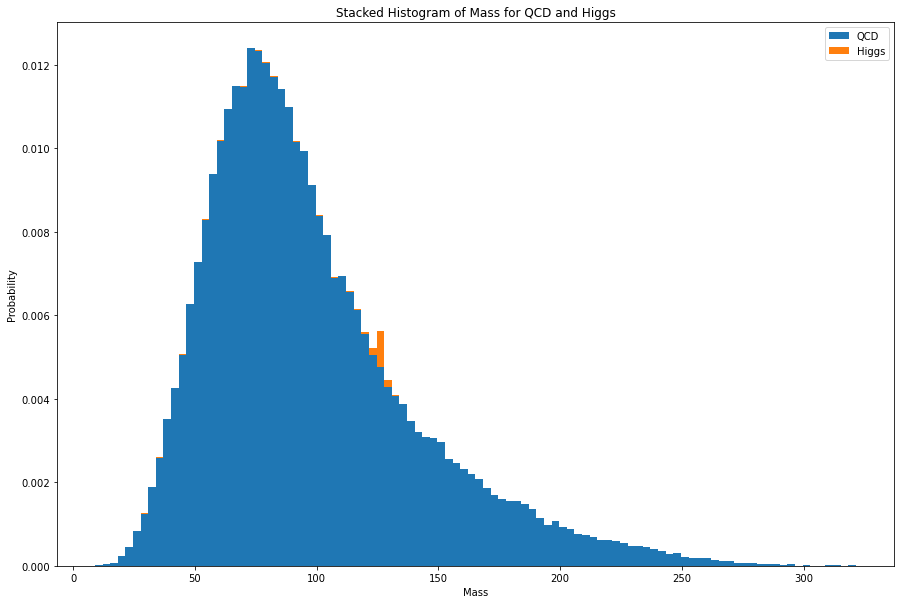

In [3]:
n_higgs = 100 / 100000
n_qcd = 20000 / 100000

fig, ax = plt.subplots(1, 1, figsize = (15, 10))

qcd_weight = np.array([n_qcd] * len(qcd['mass']))
higgs_weight = np.array([n_higgs] * len(higgs['mass']))

ax.hist([qcd['mass'], higgs['mass']], bins = 100, density = True, stacked = True, weights = [qcd_weight, higgs_weight])

ax.legend(["QCD", "Higgs"])
ax.set_title("Stacked Histogram of Mass for QCD and Higgs")
ax.set_xlabel("Mass")
ax.set_ylabel("Probability")

plt.show()

In [4]:
n_higgs = 100
n_qcd = 20000

exp_prob = stats.poisson.cdf(n_higgs + n_qcd, n_qcd, loc = 0)
exp_sig = stats.norm.ppf(exp_prob)

approx_sig = n_higgs / np.sqrt(n_qcd)

print("The expected significance of the Higgs Boson is " + str(exp_sig) + ". The approximation is " + str(approx_sig) + ".")

The expected significance of the Higgs Boson is 0.7112259282313185. The approximation is 0.7071067811865475.


# Mass Cuts

In [5]:
bin_size = 33
upper_val = 330

hist_qcd = ax.hist(qcd['mass'], bins = bin_size, density = False, weights = [qcd_weight], range = (0, upper_val))
hist_higgs = ax.hist(higgs['mass'], bins = bin_size, density = False, weights = [higgs_weight], range = (0, upper_val))

cut_sigs = []
for i in range(bin_size):
    n_qcd = hist_qcd[0][i]
    n_higgs = hist_higgs[0][i]
    sig = stats.norm.ppf(stats.poisson.cdf(n_higgs + n_qcd, n_qcd, loc = 0))
    cut_sigs.append(sig)
    
index_max = cut_sigs.index(max(cut_sigs))
print("Optimal cut is between " + str(hist_qcd[1][index_max]) + " and " + str(hist_qcd[1][index_max] + (upper_val / bin_size)) + " with an expected significance of " + str(cut_sigs[index_max]))

Optimal cut is between 120.0 and 130.0 with an expected significance of 2.4116886489260785


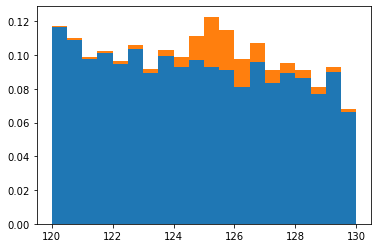

In [6]:
fig, ax = plt.subplots(1, 1)

ax.hist([qcd['mass'], higgs['mass']], bins = 20, density = True, stacked = True, weights = [qcd_weight, higgs_weight], range = (120, 130))
plt.show()

# Other Cuts

For pt, the optimal cut is between 475.0123663250928 and 500.01235833562953 with an expected significance of 0.7225826401138794
For eta, the optimal cut is between -0.3454629814164307 and -0.18583283651390878 with an expected significance of 0.31306741330895566
For phi, the optimal cut is between -0.3141378576900795 and -0.15705925482086408 with an expected significance of 0.18020548945921394
For ee2, the optimal cut is between 0.12577966743630484 and 0.1505768429923671 with an expected significance of 1.0618934525932457
For ee3, the optimal cut is between 0.087205568904505 and 0.09301926282048234 with an expected significance of 0.9105386773865511
For d2, the optimal cut is between 55.762713360311245 and 60.8205414238128 with an expected significance of 0.9105386773865511
For angularity, the optimal cut is between 0.04824169256057458 and 0.05092178336771358 with an expected significance of 0.9105386773865511
For t1, the optimal cut is between 3.0544446806406595 and 3.2515307216490683 

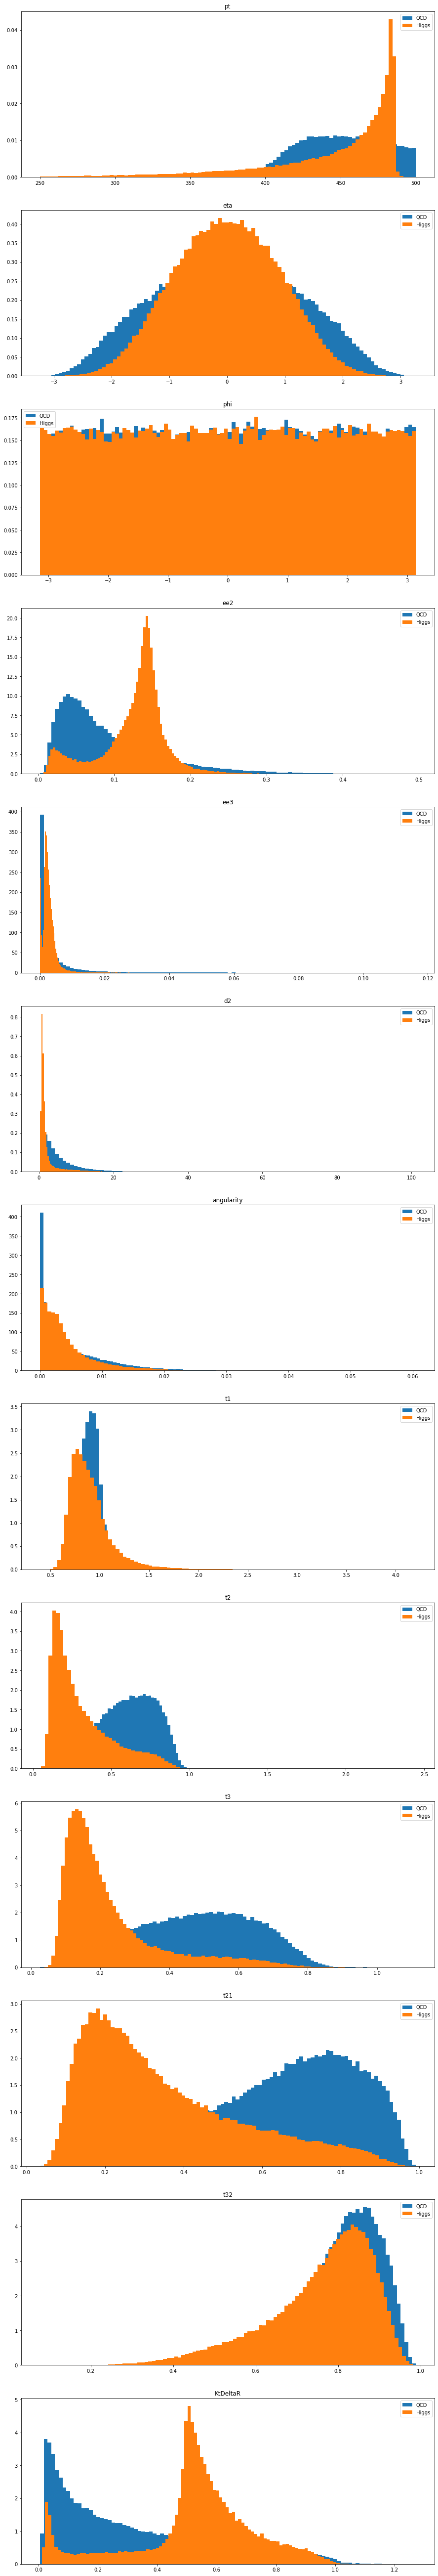

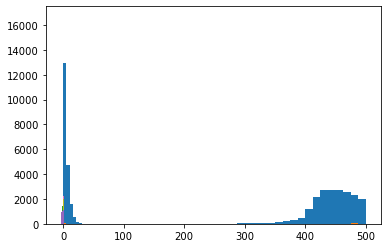

In [7]:
n_higgs = 100 / 100000
n_qcd = 20000 / 100000

fig, ax = plt.subplots(13, 1, figsize = (15, 95))
fig2, ax2 = plt.subplots(1,1)

j = 0
for key in qcd:
    if key != 'mass':
        # For graphing
        n_higgs = 100 / 100000
        n_qcd = 20000 / 100000
        
        qcd_weight = np.array([n_qcd] * len(qcd[key]))
        higgs_weight = np.array([n_higgs] * len(higgs[key]))

#         ax[j].hist([qcd[key], higgs[key]], bins = 100, density = True, stacked = True, weights = [qcd_weight, higgs_weight])
        ax[j].hist(qcd[key], bins = 100, density = True)
        ax[j].hist(higgs[key], bins = 100, density = True)
        ax[j].set_title(key)
        ax[j].legend(["QCD", "Higgs"])
        
        # For cuts
        bin_size = 20

        lower_val = qcd[key].min()
        upper_val = qcd[key].max()

        hist_qcd = ax2.hist(qcd[key], bins = bin_size, density = False, weights = [qcd_weight], range = (lower_val, upper_val))
        hist_higgs = ax2.hist(higgs[key], bins = bin_size, density = False, weights = [higgs_weight], range = (lower_val, upper_val))

        cut_sigs = []
        for i in range(bin_size):
            n_qcd = hist_qcd[0][i]
            n_higgs = hist_higgs[0][i]
            sig = stats.norm.ppf(stats.poisson.cdf(n_higgs + n_qcd, n_qcd, loc = 0))
            if sig != float('inf'):
                cut_sigs.append(sig)
        if len(cut_sigs) > 0:
            index_max = cut_sigs.index(max(cut_sigs, key = abs))
            print("For " + key + ", the optimal cut is between " + str(hist_qcd[1][index_max]) + " and " + str(hist_qcd[1][index_max] + (upper_val / bin_size)) + " with an expected significance of " + str(cut_sigs[index_max]))
        else:
            print("None for " + key)
        
        j = j + 1

plt.show()

pt
For pt, the optimal cut is between 475.0123663250928 and 487.50610326791383 with an expected significance of 0.7225826401138794
[20, 0.7225826401138794, 18]
 --------------- 
eta
For eta, the optimal cut is between -3.240244155525688 and 3.1926028980504393 with an expected significance of 0.7041666185570017
[1, 0.7041666185570017, 0]
 --------------- 
phi
For phi, the optimal cut is between -3.1415368791145792 and 3.1415720573843084 with an expected significance of 0.7041666185570017
[1, 0.7041666185570017, 0]
 --------------- 
ee2
For ee2, the optimal cut is between 0.1011020778573088 and 0.19981243617329286 with an expected significance of 1.1018538546847028
[5, 1.1018538546847028, 1]
 --------------- 
ee3
For ee3, the optimal cut is between 0.10464655455353006 and 0.11627387831954676 with an expected significance of 0.9105386773865511
[10, 0.9105386773865511, 9]
 --------------- 
d2
For d2, the optimal cut is between 0.2813436928759825 and 1.2900958686475326 with an expected sign

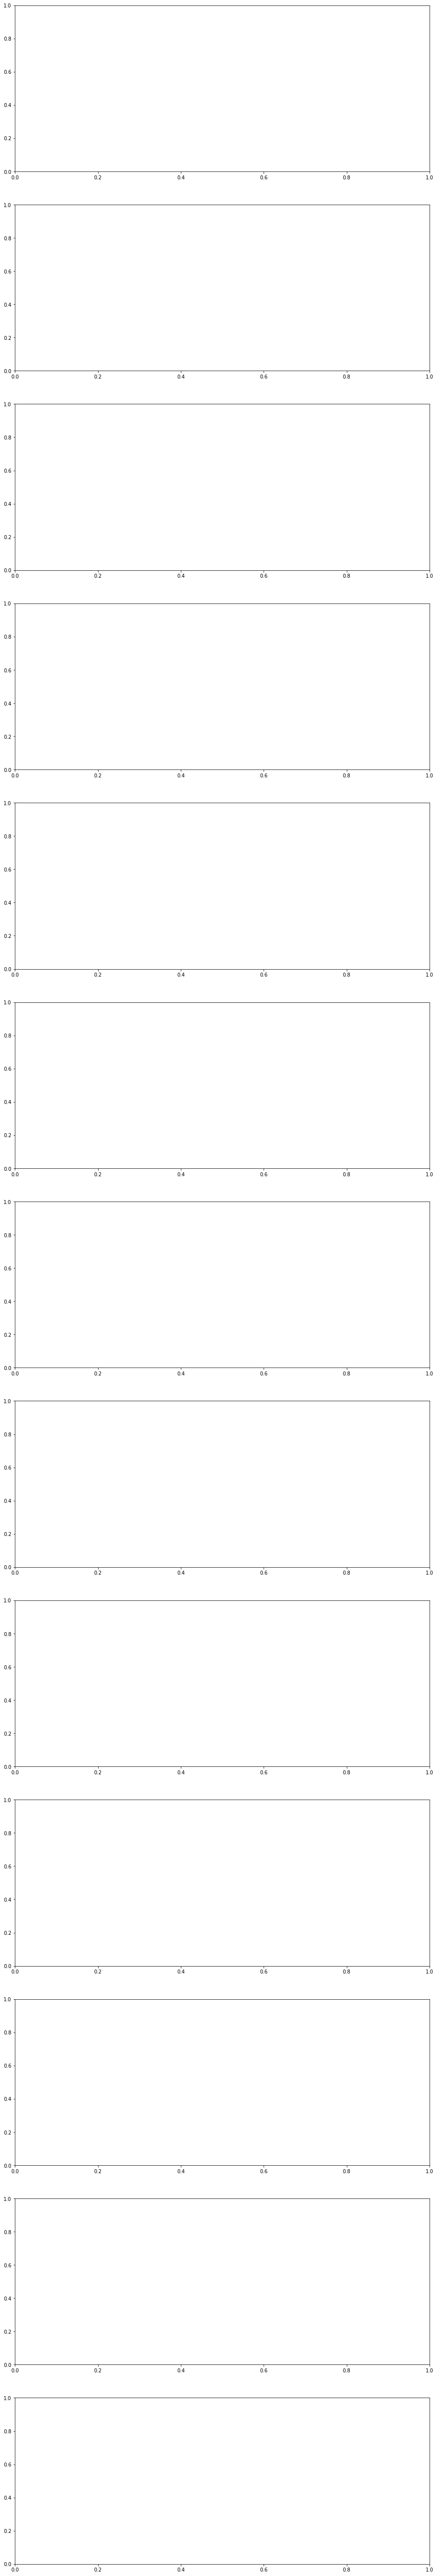

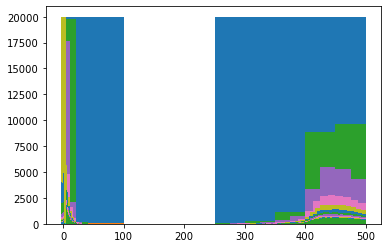

In [8]:
n_higgs = 100 / 100000
n_qcd = 20000 / 100000

fig, ax = plt.subplots(13, 1, figsize = (15, 95))
fig2, ax2 = plt.subplots(1,1)

j = 0
for key in qcd:
    if key != 'mass':
        print(key)
        n_higgs = 100 / 100000
        n_qcd = 20000 / 100000
        qcd_weight = np.array([n_qcd] * len(qcd[key]))
        higgs_weight = np.array([n_higgs] * len(higgs[key]))

        # For graphing
##        ax[j].hist([qcd[key], higgs[key]], bins = 100, density = True, stacked = True, weights = [qcd_weight, higgs_weight])
#         ax[j].hist(qcd[key], bins = 100, density = True)
#         ax[j].hist(higgs[key], bins = 100, density = True)
#         ax[j].set_title(key)
#         ax[j].legend(["QCD", "Higgs"])
        
        # For cuts
        max_array = []
        for bin_num in [1, 5, 10, 20, 30, 40, 50, 60, 70,80, 90, 100]:
            
            lower_val = qcd[key].min()
            upper_val = qcd[key].max()

            hist_qcd = ax2.hist(qcd[key], bins = bin_num, density = False, weights = [qcd_weight], range = (lower_val, upper_val))
            hist_higgs = ax2.hist(higgs[key], bins = bin_num, density = False, weights = [higgs_weight], range = (lower_val, upper_val))

            cut_sigs = []
            for i in range(bin_num):
                n_qcd = hist_qcd[0][i]
                n_higgs = hist_higgs[0][i]
                sig = stats.norm.ppf(stats.poisson.cdf(n_higgs + n_qcd, n_qcd, loc = 0))
                if sig != float('inf'):
                    cut_sigs.append(sig)
                    
            index_max = cut_sigs.index(max(cut_sigs, key = abs))
            max_array.append([bin_num, cut_sigs[index_max], index_max])
  
        max_sig = max_array[0][1]
        ind = 0
        for k in range(len(max_array)):
#             print(max_array[k][1])
            if abs(max_array[k][1]) > abs(max_sig):
                max_sig = max_array[k][1]
                ind = k
        
        bottom_val = lower_val + max_array[ind][2] * ((upper_val - lower_val) / max_array[ind][0])
        top_val = bottom_val + ((upper_val - lower_val) / max_array[ind][0])
        print("For " + key + ", the optimal cut is between " + str(bottom_val) + " and " + str(top_val) + " with an expected significance of " + str(max_array[ind][1]))
        print(max_array[ind])
        print(" --------------- ")
                    
                    
#         if len(cut_sigs) > 0:
#             index_max = cut_sigs.index(max(cut_sigs))
#             print("For " + key + ", the optimal cut is between " + str(hist_qcd[1][index_max]) + " and " + str(hist_qcd[1][index_max] + (upper_val / bin_size)) + " with an expected significance of " + str(cut_sigs[index_max]))
#         else:
#             print("None for " + key)
        
        j = j + 1

# plt.show()





# fig, ax = plt.subplots(13, 1, figsize = (15, 95))
# fig2, ax2 = plt.subplots(1,1)

# j = 0
# for key in qcd:
#     # For graphing
#     n_higgs = 100 / 100000
#     n_qcd = 20000 / 100000
    
#     qcd_weight = np.array([n_qcd] * len(qcd[key]))
#     higgs_weight = np.array([n_higgs] * len(higgs[key]))

# #         ax[j].hist([qcd[key], higgs[key]], bins = 100, density = True, stacked = True, weights = [qcd_weight, higgs_weight])
#     ax[j].hist(qcd[key], bins = 100, density = True)
#     ax[j].hist(higgs[key], bins = 100, density = True)
#     ax[j].set_title(key)
#     ax[j].legend(["QCD", "Higgs"])

#     # For cuts
#     for bin_num in [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]:
#         print(bin_num)
#         bin_size = bin_num

#         lower_val = qcd[key].min()
#         upper_val = qcd[key].max()

#         hist_qcd = ax2.hist(qcd[key], bins = bin_size, density = False, weights = [qcd_weight], range = (lower_val, upper_val))
#         hist_higgs = ax2.hist(higgs[key], bins = bin_size, density = False, weights = [higgs_weight], range = (lower_val, upper_val))

#         cut_sigs = []
#         for i in range(bin_size):
#             n_qcd = hist_qcd[0][i]
#             n_higgs = hist_higgs[0][i]
#             sig = stats.norm.ppf(stats.poisson.cdf(n_higgs + n_qcd, n_qcd, loc = 0))
#             if sig != float('inf'):
#                 cut_sigs.append(sig)
#         if len(cut_sigs) > 0:
#             index_max = cut_sigs.index(max(cut_sigs, key = abs))
#             print("For " + key + ", the optimal cut is between " + str(hist_qcd[1][index_max]) + " and " + str(hist_qcd[1][index_max] + (upper_val / bin_size)) + " with an expected significance of " + str(cut_sigs[index_max]))
#         else:
#             print("None for " + key)

#     j = j + 1

# plt.show()